In [1]:
import pandas as pd
import numpy as np

In [25]:
train_data = pd.read_csv('./used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv('./used_car_testB_20200421.csv', sep=' ')
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [26]:
# 查看数据缺失值
print(train_data.isnull().any())#Return whether any element is True, potentially over an axis.
print('*'*19)
print(train_data.isnull().sum())

SaleID               False
name                 False
regDate              False
model                 True
brand                False
bodyType              True
fuelType              True
gearbox               True
power                False
kilometer            False
notRepairedDamage    False
regionCode           False
seller               False
offerType            False
creatDate            False
price                False
v_0                  False
v_1                  False
v_2                  False
v_3                  False
v_4                  False
v_5                  False
v_6                  False
v_7                  False
v_8                  False
v_9                  False
v_10                 False
v_11                 False
v_12                 False
v_13                 False
v_14                 False
dtype: bool
*******************
SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
b

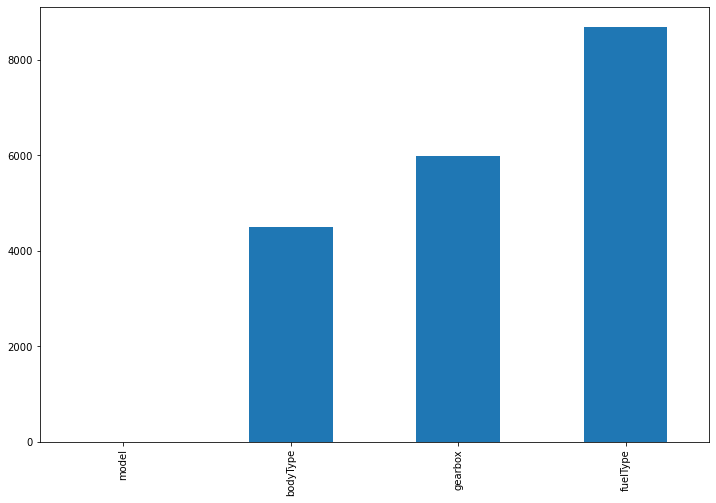

In [27]:
# null可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

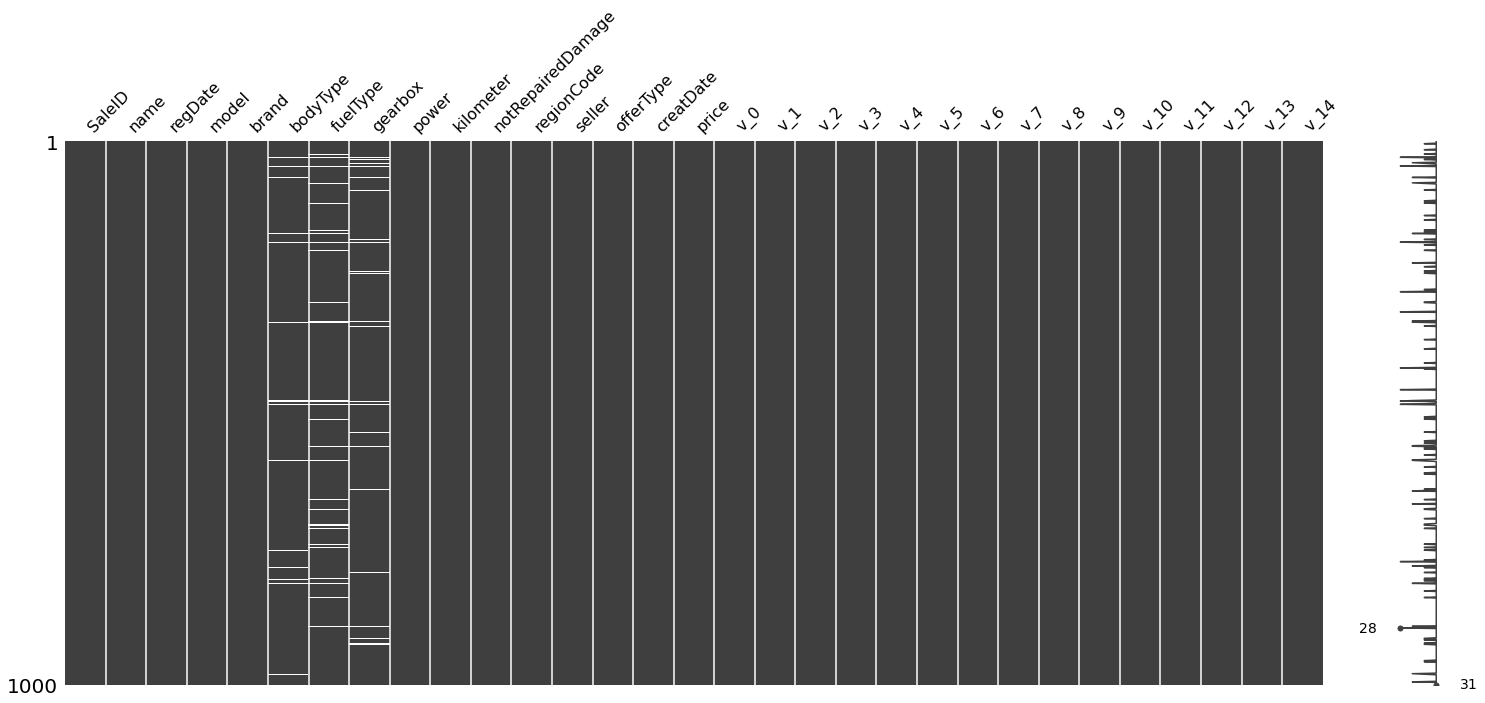

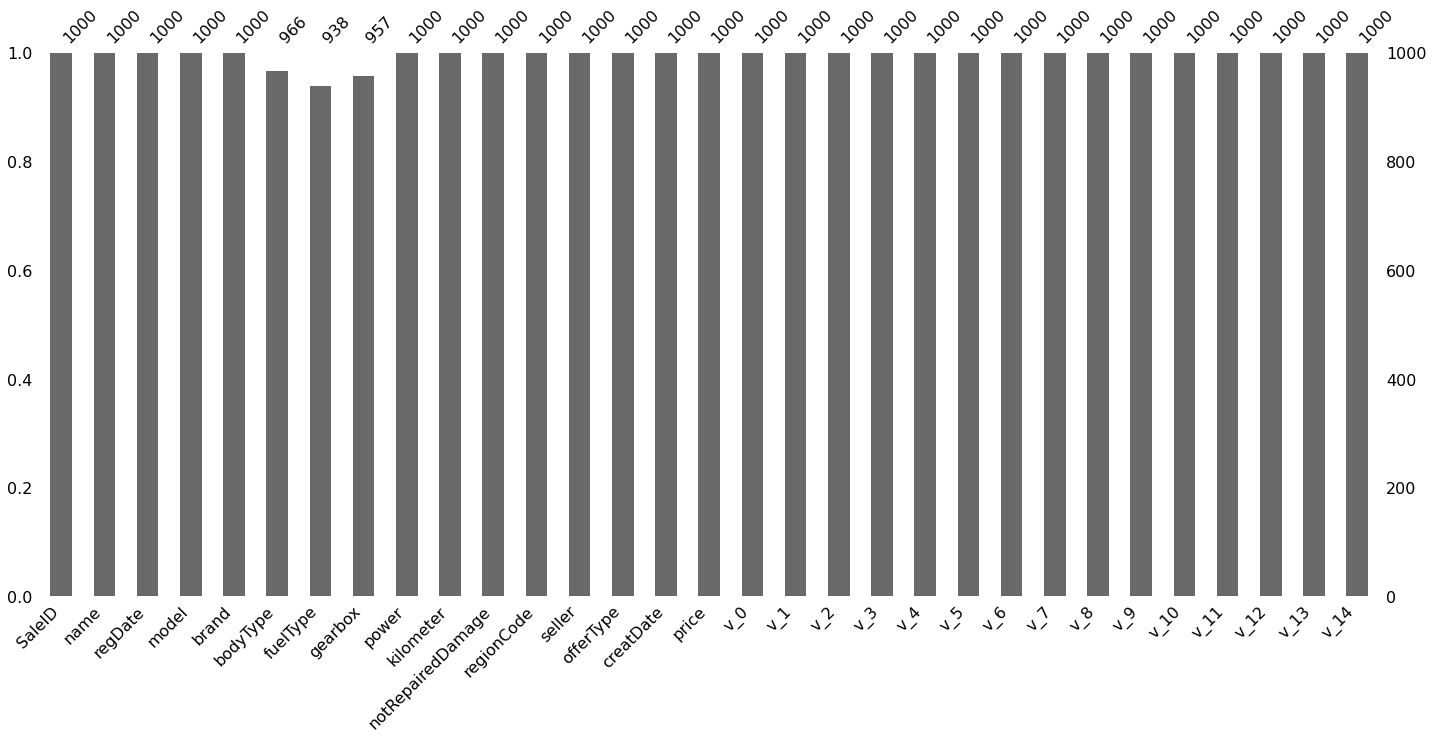

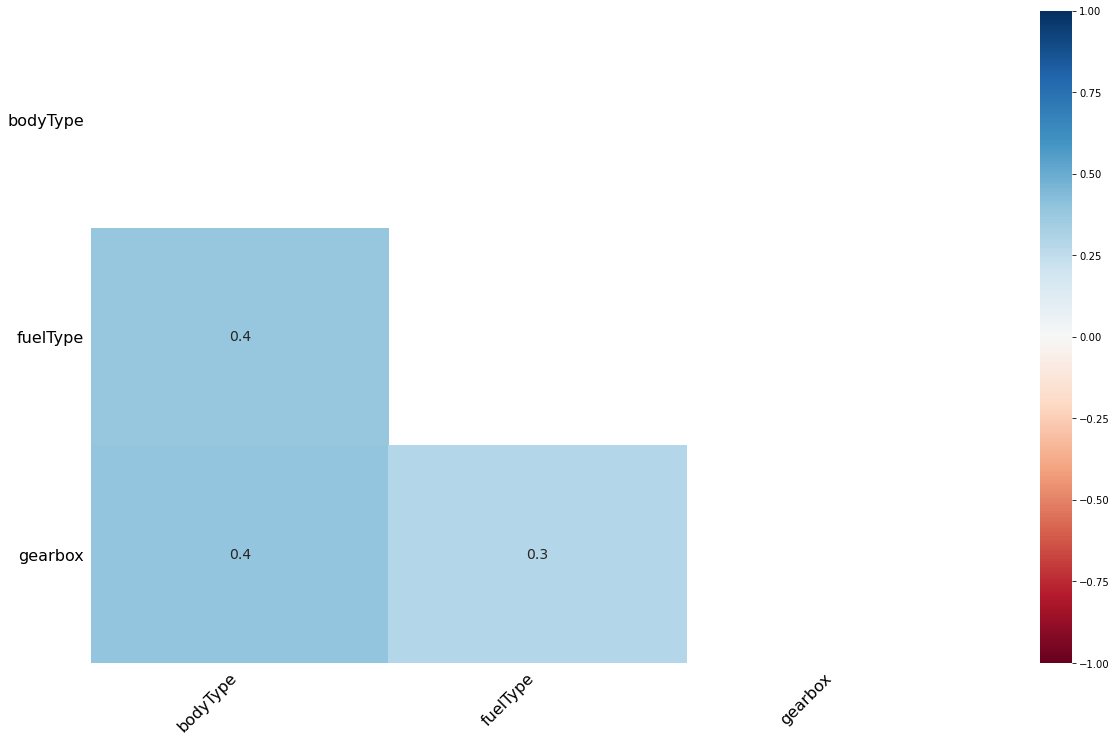

In [28]:
import missingno as msno
sample = train_data.sample(1000)
msno.matrix(sample)
plt.show()
msno.bar(sample)
plt.show()
msno.heatmap(sample)
plt.show()

In [29]:
# # 一行代码生成报告
# import pandas_profiling as pp
# report = pp.ProfileReport(train_data)
# # 导出为html
# report.to_file('report.html')

(array([   56.,   223.,  1508.,  6232., 22319., 35387., 39059., 33184.,
        11123.,   909.]),
 array([ 2.39789527,  3.30939729,  4.22089931,  5.13240133,  6.04390335,
         6.95540537,  7.86690739,  8.77840941,  9.68991143, 10.60141345,
        11.51291546]),
 <BarContainer object of 10 artists>)

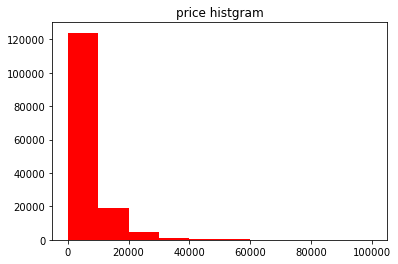

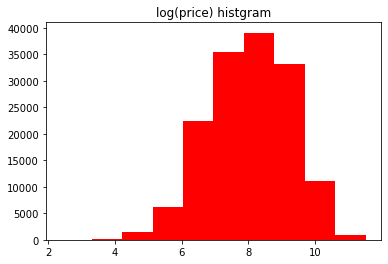

In [30]:
plt.figure(1)
plt.title('price histgram')
plt.hist(train_data['price'], color = 'r')
plt.figure(2)
plt.title('log(price) histgram')
plt.hist(np.log(train_data['price']), color ='red')

D:\program\anaconda3-2020.2\envs\TF2.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


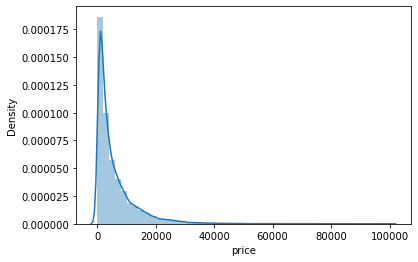

skewness: 3.346487
Kurtosis: 18.995183


In [31]:
import seaborn as sns
# 计算偏度和峰度（与正态分布比较）
sns.distplot(train_data['price'])
plt.show()
print('skewness: %f' %train_data['price'].skew())
print('Kurtosis: %f' %train_data['price'].kurt())

In [32]:
print(train_data['notRepairedDamage'].value_counts())
train_data['notRepairedDamage'].replace('-','0.0',inplace=True)
print(test_data['notRepairedDamage'].value_counts())
test_data['notRepairedDamage'].replace('-','0.0',inplace=True)

train_data = train_data.astype('float')
test_data = test_data.astype('float')

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64
0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64


In [33]:
# 提取数值类型的特征列名 
numerical_cols = train_data.select_dtypes(exclude='object').columns#类别型特征(object)
print(numerical_cols)

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')


In [34]:
# 提取类别型的特征列名 
categorical_cols = train_data.select_dtypes(include='object').columns#类别型特征(object)
print(categorical_cols)

Index([], dtype='object')


In [35]:
# 特征选择
feature_cols = [col for col in numerical_cols if col not in ['SaleID','regDate','creatDate','price'] ]
print(feature_cols)

['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller', 'offerType', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']


In [36]:
# 准备训练数据
X_data = train_data[feature_cols]
y_data = train_data['price']

X_test = test_data[feature_cols]
print('训练数据 shape:',X_data.shape)
print('测试数据 shape:',X_test.shape)

训练数据 shape: (150000, 27)
测试数据 shape: (50000, 27)


In [37]:
# 设定统计函数
def show_stats(data):
    print('min',np.min(data))
    print('max',np.max(data))
    print('ptp',np.ptp(data))#Range of values (maximum - minimum) along an axis.
    print('mean',np.mean(data))
    print('std',np.std(data))
    print('var',np.var(data))

In [38]:
# 统计y_data的情况
show_stats(y_data)

min 11.0
max 99999.0
ptp 99988.0
mean 5923.327333333334
std 7501.973469876635
var 56279605.942732885


In [39]:
# 缺省值用-1补全
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

In [40]:
from sklearn.model_selection import train_test_split
# 数据集切分
x_train,x_val,y_train,y_val = train_test_split(X_data,y_data,test_size=0.2)

In [42]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimator=150, learning_rate = 0.1,\
                       gamma=0,colsample_bytree=0.9,max_depth=7)
model.fit(x_train,y_train)
print('XGB预测结果的统计情况')
predict_y = model.predict(x_val)
show_stats(predict_y)

MAE_xgb = mean_absolute_error(y_val, predict_y)
print('XGBoost Validation MAE:', MAE_xgb)

[00:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGB预测结果的统计情况
min -200.47401
max 91567.984
ptp 91768.46
mean 5878.219
std 7259.988
var 52707420.0
XGBoost Validation MAE: 676.418627969559


In [21]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
# XGBoost训练
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val, val_xgb)
print('XGBoost Validation MAE:', MAE_xgb)

NameError: name 'x_train' is not defined

In [82]:
answer = pd.DataFrame()
answer['SaleID'] = test_data.SaleID
answer['price'] = predict_y
answer.to_csv('./ans_xgb.csv', index = False)